# Домашння работа
## Попытка обогнать numpy, не зная основ высокоэффективных вычислений

### Условия проведения
* система: Linux 6.12.47-gentoo-dist cpu:AMD Ryzen 7 6800HS ram:13.3Gb 
* numpy: 2.3.1 (Собран с флагами -march=native -mtune=native -O2 -flto -fsemantic-interposition)
* BLAS провайдер: Вероятно LAPAC, проверю позже
Код противника писался на xtensor(библиотека сохнаняющая почти все интерфейсы numpy)
#### На данный моемент в нормальном виде реализованы:
* Ugaus  -- "обычный" Гаусс
* Gaus  -- Гаусс с выбором главного элемента(по строкам)
* LU  -- солвер на LU разложении
* Oth  -- метод ортогонализации(плохие скорости, не участвует в сравнении, будет переделан позже)
##### Другие участники:
* py  -- солвер numpy(под капотом BLAS)
* XT::BLAS -- солвер xtensor(под капотом BLAS)

## Метод тестирования:
Запускается незамысловатый скрипт(tools/tester.sh). Этот скрипт выполняет цикл вида:
``` bash
for i in {1...1000}; do
    python gen_matrix.py "$i" > /tmp/matrix
    cat /tmp/matrix | ./xtensor_solver >> "test1000"
    cat /tmp/matrix | ./numpy_solver.py >> "test1000"
done
```
gen_matrix.py(tools/generator.py) с зафиксированным sid-ом генерирует матрицу и вектор для решения. Далее этот результат пишется в stdin бинарника xtensor и скрипта на питоне.
В файл test1000 записываются результаты тестирования(пример в папке tests).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
Test_1000=dict()
types = ["Ugaus","Gaus","LU","py","XT::BLAS"]
for i in types:
    Test_1000[i]=([],[])
with open("tests/test10000_ntb") as f:
    for i in f.readlines():
        tmp = i.split()
        Test_1000[tmp[0]][0].append(int(tmp[1]))
        Test_1000[tmp[0]][1].append(float(tmp[2]))

for i in types:
    Test_1000[i]=(np.array(Test_1000[i][0]),np.array(Test_1000[i][1]))

# Время выполения 3<N<1000

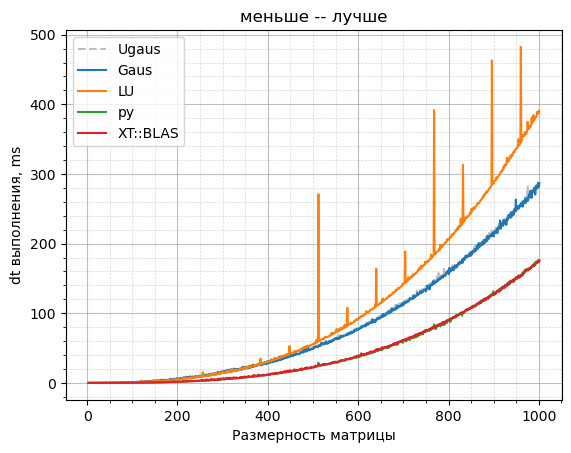

In [11]:
plt.plot(Test_1000["Ugaus"][0], Test_1000["Ugaus"][1], '--', color='gray', alpha=0.5, label="Ugaus")
for i in types[1:]:
    plt.plot(Test_1000[i][0], Test_1000[i][1], label=i)
    
plt.grid(True, which='major', alpha=0.5, linewidth=0.8, color='gray')
plt.grid(True, which='minor', alpha=0.3, linestyle='--', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.xlabel("Размерность матрицы")
plt.ylabel("dt выполнения, ms")
plt.title("меньше -- лучше")
plt.legend()

# Отношение времени выполнения 3<N<1000.

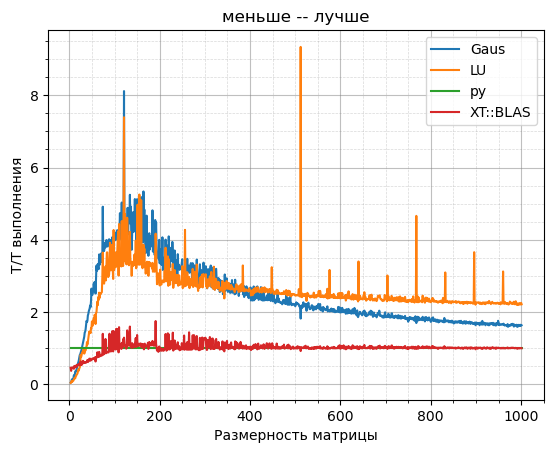

In [13]:
for i in types[1:]:
    plt.plot(Test_1000[i][0], Test_1000[i][1]/Test_1000["py"][1], label=i)
    
plt.grid(True, which='major', alpha=0.5, linewidth=0.8, color='gray')
plt.grid(True, which='minor', alpha=0.3, linestyle='--', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.xlabel("Размерность матрицы")
plt.ylabel("T/T выполнения")
plt.title("меньше -- лучше")
plt.legend()